In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
from scipy.io import loadmat
import timeit
import tensorflow as tf
import cv2
from mlxtend.preprocessing import one_hot
from load_MRI_data import *

%matplotlib inline

In [2]:
'''
load_subject_list = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,
                     28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,
                    51,52,53,54,55,56,57,58,59]
'''

'\nload_subject_list = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,\n                     28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,\n                    51,52,53,54,55,56,57,58,59]\n'

In [2]:
load_subject_list = [1,2,3,4,5,6,7,8,9,10]

In [3]:
train_X = []
train_Y = []
start = timeit.default_timer()
for i in load_subject_list:
    temp_pd = load_mat_file(i)
    temp_path, folder_path = get_path(temp_pd, i, 'pain', from_nas=False)
    print("loading {} files".format(folder_path))
    temp_y = temp_pd[2].values
    
    for j in range(temp_y.shape[0]):
        train_Y.append(temp_y[j][0])

    temp_nii = get_nii_data(temp_path)
    
    if i == 1:
        train_X = temp_nii
    else:
        train_X = np.concatenate((train_X, temp_nii), axis=0)
        
    stop = timeit.default_timer()
    check_time = stop-start
    print("excecuted time : {}".format(check_time))
    
#train_X = train_X[:,:,:,:,np.newaxis]
train_X = np.nan_to_num(train_X)
train_Y = np.nan_to_num(train_Y)
train_Y = np.array(train_Y, dtype='f')
#train_Y = train_Y[:,np.newaxis]

print(train_X.shape)
print(train_Y.shape)

loading ./data/SEMIC/first_level/model03a_SPM_SINGLE_TRIAL_PAIN/sub-semic001 files
excecuted time : 0.2928229349781759
loading ./data/SEMIC/first_level/model03a_SPM_SINGLE_TRIAL_PAIN/sub-semic002 files
excecuted time : 0.6294923419482075
loading ./data/SEMIC/first_level/model03a_SPM_SINGLE_TRIAL_PAIN/sub-semic003 files
excecuted time : 1.0508854229701683
loading ./data/SEMIC/first_level/model03a_SPM_SINGLE_TRIAL_PAIN/sub-semic004 files
excecuted time : 1.555334522970952
loading ./data/SEMIC/first_level/model03a_SPM_SINGLE_TRIAL_PAIN/sub-semic005 files
excecuted time : 2.119976167974528
loading ./data/SEMIC/first_level/model03a_SPM_SINGLE_TRIAL_PAIN/sub-semic006 files
excecuted time : 2.757391461986117
loading ./data/SEMIC/first_level/model03a_SPM_SINGLE_TRIAL_PAIN/sub-semic007 files
excecuted time : 3.4824589529889636
loading ./data/SEMIC/first_level/model03a_SPM_SINGLE_TRIAL_PAIN/sub-semic008 files
excecuted time : 4.271928830945399
loading ./data/SEMIC/first_level/model03a_SPM_SINGLE

In [4]:
y = train_Y

In [5]:
y = pd.DataFrame(data=train_Y, dtype=np.float32)

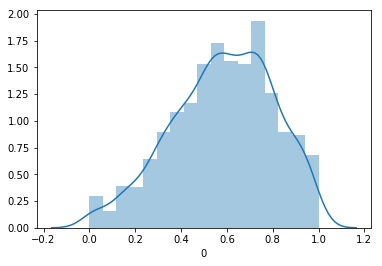

In [6]:
sns.distplot(y[0])

In [7]:
X = []
for i in range(train_X.shape[0]):
    temp_x = train_X[i,:,:,:]
    temp_flatten_x = temp_x.flatten()
    temp_flatten_x = temp_flatten_x[np.newaxis,:]
    if i == 0:
        X = temp_flatten_x
    else:
        X = np.concatenate((X, temp_flatten_x),axis=0)
    print("finished flatten {}th data".format(i+1))
X = pd.DataFrame(X)

finished flatten 1th data
finished flatten 2th data
finished flatten 3th data
finished flatten 4th data
finished flatten 5th data
finished flatten 6th data
finished flatten 7th data
finished flatten 8th data
finished flatten 9th data
finished flatten 10th data
finished flatten 11th data
finished flatten 12th data
finished flatten 13th data
finished flatten 14th data
finished flatten 15th data
finished flatten 16th data
finished flatten 17th data
finished flatten 18th data
finished flatten 19th data
finished flatten 20th data
finished flatten 21th data
finished flatten 22th data
finished flatten 23th data
finished flatten 24th data
finished flatten 25th data
finished flatten 26th data
finished flatten 27th data
finished flatten 28th data
finished flatten 29th data
finished flatten 30th data
finished flatten 31th data
finished flatten 32th data
finished flatten 33th data
finished flatten 34th data
finished flatten 35th data
finished flatten 36th data
finished flatten 37th data
finished f

finished flatten 298th data
finished flatten 299th data
finished flatten 300th data
finished flatten 301th data
finished flatten 302th data
finished flatten 303th data
finished flatten 304th data
finished flatten 305th data
finished flatten 306th data
finished flatten 307th data
finished flatten 308th data
finished flatten 309th data
finished flatten 310th data
finished flatten 311th data
finished flatten 312th data
finished flatten 313th data
finished flatten 314th data
finished flatten 315th data
finished flatten 316th data
finished flatten 317th data
finished flatten 318th data
finished flatten 319th data
finished flatten 320th data
finished flatten 321th data
finished flatten 322th data
finished flatten 323th data
finished flatten 324th data
finished flatten 325th data
finished flatten 326th data
finished flatten 327th data
finished flatten 328th data
finished flatten 329th data
finished flatten 330th data
finished flatten 331th data
finished flatten 332th data
finished flatten 333

finished flatten 591th data
finished flatten 592th data
finished flatten 593th data
finished flatten 594th data
finished flatten 595th data
finished flatten 596th data
finished flatten 597th data
finished flatten 598th data
finished flatten 599th data
finished flatten 600th data
finished flatten 601th data
finished flatten 602th data
finished flatten 603th data
finished flatten 604th data
finished flatten 605th data
finished flatten 606th data
finished flatten 607th data
finished flatten 608th data
finished flatten 609th data
finished flatten 610th data
finished flatten 611th data
finished flatten 612th data
finished flatten 613th data
finished flatten 614th data
finished flatten 615th data
finished flatten 616th data
finished flatten 617th data
finished flatten 618th data
finished flatten 619th data
finished flatten 620th data
finished flatten 621th data
finished flatten 622th data
finished flatten 623th data
finished flatten 624th data
finished flatten 625th data
finished flatten 626

finished flatten 884th data
finished flatten 885th data
finished flatten 886th data
finished flatten 887th data
finished flatten 888th data
finished flatten 889th data
finished flatten 890th data
finished flatten 891th data
finished flatten 892th data
finished flatten 893th data
finished flatten 894th data
finished flatten 895th data
finished flatten 896th data
finished flatten 897th data
finished flatten 898th data
finished flatten 899th data
finished flatten 900th data
finished flatten 901th data
finished flatten 902th data
finished flatten 903th data
finished flatten 904th data
finished flatten 905th data
finished flatten 906th data
finished flatten 907th data
finished flatten 908th data
finished flatten 909th data
finished flatten 910th data
finished flatten 911th data
finished flatten 912th data
finished flatten 913th data
finished flatten 914th data
finished flatten 915th data
finished flatten 916th data
finished flatten 917th data
finished flatten 918th data
finished flatten 919

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lm = LinearRegression()

In [12]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
coef_flatten = lm.coef_.flatten()

In [45]:
coef_flatten.shape

(592895,)

In [46]:
cdf = pd.DataFrame(coef_flatten, X.columns,columns=['Coeff'])
cdf.head()

,Coeff
0,3.314228e-06
1,3.468711e-06
2,-1.830136e-06
3,-8.804491e-07
4,-9.720679e-08


In [16]:
cdf.describe()

,Coeff
count,5.928950e+05
mean,-2.095091e-07
std,1.951962e-05
min,-3.949207e-04
25%,-3.936166e-06
50%,0.000000e+00
75%,3.112982e-06
max,4.149939e-04


In [47]:
predictions = lm.predict(X_test)

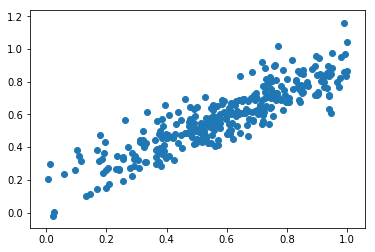

In [48]:
plt.scatter(y_test, predictions)

In [49]:
from sklearn import metrics

In [50]:
metrics.mean_absolute_error(y_test,predictions)

0.081889726

In [51]:
metrics.mean_squared_error(y_test,predictions)

0.011055829

In [52]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

0.1051467

In [53]:
r_2 = metrics.r2_score(y_test,predictions)

In [54]:
r_2

0.786761242307233

In [55]:
np.corrcoef(y_test.T, predictions.T)

array([[1.        , 0.88817385],
       [0.88817385, 1.        ]])

In [67]:
coef = coef_flatten.reshape((79,95,79))

In [66]:
import scipy.io as sio

In [68]:
sio.savemat('SEMIC_10sub_cef_2.mat', {'coef':coef})